In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [4]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#Own written sgd regression function
def sgdreg( X, y, w = 0, b = 0, r = 0.001, itr = 1000):
    X_X, X, Y_Y, y = train_test_split(X, y, test_size = 0.1, random_state = 5)
    del(X_X,Y_Y)
    n = int(X.shape[1])
    N = float(y.shape[0])
    y = np.reshape(y, (int(N),1))
    w = np.zeros(n)
    w = np.reshape(w, (1,n))
    for i in range(itr):
        newy = np.sum((np.multiply(w,X) + b),axis = 1)
        w_grad = - 2 * np.sum(np.multiply(X, (y - np.reshape(newy ,(newy.shape[0],1)))), axis = 0)
        w_grad = w_grad / N
        w_grad = np.reshape(w_grad, (1,w_grad.shape[0]))
        b_grad = - 2 * np.sum(y - np.reshape(newy ,(newy.shape[0],1)), axis = 0)
        b_grad = b_grad / N
        w = w - (r * w_grad)
        b = b - (r * b_grad)
    return w , b

In [6]:
w,b = sgdreg(X_train,Y_train)
print(w.shape)

(1, 13)


In [7]:
#Own written predict function
def sgdpredict(w,b,X):
    y = np.sum((np.multiply(w,X) + b),axis = 1)
    return y

In [8]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [9]:
y_own_pred = sgdpredict(w,b,X)
custommse = mean_squared_error(Y, y_own_pred)
print(custommse)

26.997586141403293


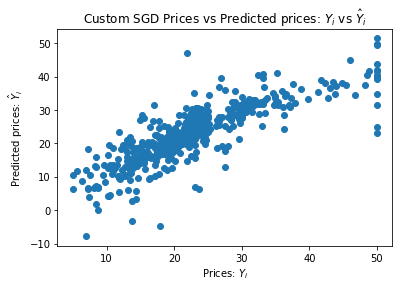

In [10]:
plt.scatter(Y, y_own_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Custom SGD Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [11]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [12]:
clf = SGDRegressor()
clf.fit(X, Y)
sgdmse = mean_squared_error(Y, clf.predict(X))
print(sgdmse)

22.815470308411143


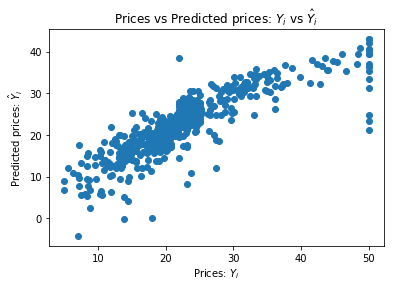

In [13]:
y_pred = clf.predict(X)
plt.scatter(Y, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [14]:
sgdcoef = clf.coef_
sgdcoef = np.reshape(sgdcoef,(1,int(sgdcoef.shape[0])))

In [15]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Weight", "Custom", "SGDRegressor"]
x.add_row(['x0', b[0], clf.intercept_[0]])
for i in range(sgdcoef.shape[1]):
    x.add_row(['x'+str(i+1), w[0][i], sgdcoef[0][i]])
print(x)

+--------+----------------------+----------------------+
| Weight |        Custom        |     SGDRegressor     |
+--------+----------------------+----------------------+
|   x0   |  1.743261688692349   |  22.347167301209826  |
|   x1   | -0.4354544553966036  |  -0.722074555028273  |
|   x2   |  0.9669389907016864  |  0.4913867451685037  |
|   x3   |  0.8976010041944158  | -0.41694214757994824 |
|   x4   |  2.100388754025155   |  0.7278755445424171  |
|   x5   | -0.45586368284051687 | -0.9552783527249578  |
|   x6   |  3.306952190404114   |  3.0640001607794916  |
|   x7   |  0.2856392013392658  | -0.22616848914429075 |
|   x8   | -1.4651546243902762  |  -2.059207860670845  |
|   x9   | 0.27415612296183073  |  0.8971391144964026  |
|  x10   | -0.17621967506765523 | -0.40793072180531526 |
|  x11   | -1.6621549641490474  | -1.8576999644361922  |
|  x12   |  1.4804021628895336  |  0.9253668647628646  |
|  x13   |  -4.560722667919942  | -3.4677085674137036  |
+--------+---------------------

In [16]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "MSE"]

x.add_row(['Custom SGERegressor', custommse])
x.add_row(['Sklearn SGERegressor', sgdmse])
print(x)

+----------------------+--------------------+
|        Model         |        MSE         |
+----------------------+--------------------+
| Custom SGERegressor  | 26.997586141403293 |
| Sklearn SGERegressor | 22.815470308411143 |
+----------------------+--------------------+
